<a href="https://colab.research.google.com/github/Location-Artistry/GEO-DEV-NOTEBOOKS/blob/main/NHBP_Data_Explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ArcREST Data Explorer**   
# Efficient ArcGIS Server Browsing Library
## Quickly view all services and layers available from an ArcGIS Server URL


### Built on top of bmi-arcgis-restapi library
bmi-arcgis-restapi provides additional functionality beyond the arcgis Python API.  It will use ArcPy if available, or open source libraries if not.
https://github.com/Bolton-and-Menk-GIS/restapi   
Also deploys GeoPandas to read in Layer Query as a GeoDataframe


## Class and Function Definitions
Creates 3 new classes:


1.   mapServer - the root ArcServer Object
2.   arcService - Services contained with the mapServer
3.   mapLayer - Layers available through a arcService




## Working to debug ArcREST Data Explorer Library to be compatible with NHBP ArcGIS Online Server Types
Working 1-15-2020


In [ ]:
!pip install bmi-arcgis-restapi
import restapi

In [16]:
# Class creates a <-mapServer object-> based on restapi.ArcServer from bmi-arcgis-restapi library
class mapServer:
# -init- function, ArcServer object as self.ags, server endpoint as self.url
  def __init__(self, url):
    try:
      creds = input(f'Credentials Needed (YES/NO)? ')
      if creds.upper() == 'YES':          
        id = input(f'ArcGIS Online USER ID: ')
        pwd = getpass.getpass('PASSWORD: ')
        self.ags = restapi.ArcServer(url, id, pwd)
      else:
        self.ags = restapi.ArcServer(url)
      self.url = url
      display('MAPSERVER OBJECT CREATED', self.ags)
    except:
      display(f'FAILED TO CREATE MAPSERVER')
# -getServices- displays and returns a list of all ArcGIS services
  def getServices(self):
    for i, service in enumerate(self.ags.services):
      display(f'{i} - Service Name: {service.name} -  Service Type: {service.type}')
    return self.ags.services 
# -getFolders- displays and returns list of all folders
  def getFolders(self):
    try:
      for i, folder in enumerate(self.ags.folders):
        display(f'{i} - Folder: {folder}') 
      return self.ags.folders
    except:
      return 0
# -getNestedServ- gets a mapServer's nested services
  def getNestedServices(self):
    for i, folder in enumerate(self.ags.folders):
      display(f'{i} - Folder: {folder}')
      ags = restapi.ArcServer(f'{self.ags.url}/{folder}')
      for z, service in enumerate(ags.services):
        display(f'   {z} - Service Name: {service.name} -  Service Type: {service.type}')
# -getAttr- get atrributes and show values for non-function methods of for MapServer Object
  def getAttr(self):
    for attribute in dir(self.ags):
      display(f'Attribute Names: {attribute} - {self.ags[attribute]}')
# -listAttr- list all attrbutes of MapServer Object
  def listAttr(self):
    return dir(self.ags)
# -getSubService- returns a arcService object within specified mapServer
  def getSubService(self, rootServer=0):
    folders = self.getFolders()
    services = self.getServices()
    display(f'{self.url} -  ')
    if not folders:
      fID = int(input(f'Select index of subservice: '))
      url = services[fID].name
      try:
        subService = self.getService(url)
        return subService
      except:
        url = (f'{self.url}/{url}/FeatureServer')
        # working here
        subService = arcService(self, url)
        return subService
    else:
      fID = int(input(f'Select index of subservice folder: '))
      serviceURL = (f'{self.url}/{folders[fID]}')
      subFolder = mapServer(serviceURL)
      subServices = subFolder.getServices()
      fID = int(input(f'Select index of subservice: '))
      serviceName = subServices[fID].name
      display(self.url, serviceName)
      subService = arcService(self, serviceName)
      return subService

# Class creates a <-arcService object-> based on ags.getService from bmi-arcgis-restapi library
class arcService:
# -init- create arcService from mapServer Class  
  def __init__(self, server, servName): 
    try:
      self.ags = server.ags.getService(servName)
      self.url = self.ags.url
      display(f'ARCSERVICE OBJECT CREATED - {self.ags.url}')  
    except:
      self.ags = restapi.MapService(servName)
      self.url = self.ags.url
      display(f'ARCSERVICE OBJECT CREATED - {self.ags.url}') 
  def getAttr(self):
    try:
      for attribute in dir(self.ags):
        display(f'Attribute Names: {attribute} - {self.ags[attribute]}')
    except:
      display(f'Could not get Attributes for: {self.ags.url}')
  def listAttr(self):
    try:
      return dir(self.ags)
    except:
      display(f'Could not get List Attributes for: {self.ags.url}')
  def desc(self):
    try:
      return self.ags.description
    except:
      display(f'Could not get Description for: {self.ags.url}')
  def spatialRef(self):
    try:
      return self.ags.spatialReference
    except:
      display(f'Could not get spatialReference for: {self.ags.url}')
  def units(self):
    try:
      return self.ags.units
    except:
      display(f'Could not get Units for: {self.ags.url}')
  def layers(self):
    try:
      return self.ags.list_layers()
    except:
      display(f'Could not list Layers for: {self.ags.url}')
  def tables(self):
    try:
      return self.ags.list_tables()
    except:
      display(f'Could not get Tables for: {self.ags.url}')
# -getLayer- returns a mapLayer from arcService Class
  def getLayer(self):
    try: 
      for i, lay in enumerate(self.ags.layers):
        display(f'{i} - {lay.name}')
      layers = self.layers()
      # small change here separate two lines of code for input ***
      time.sleep(1)
      fID = int(input('Select index of Layer: '))
      layerObj = mapLayer(self, layers[fID])
      return layerObj
    except:
      display(f'Could not Get Layers for: {self.ags.url}')
# -getTable- returns table object from arcService Class  
  def getTable(self):
    try:
      tableList = self.tables()
      for i, lay in enumerate(tableList):
        display(f'{i} - {tableList[i]}')
      time.sleep(1)
      fID = int(input(f'Select index of Table: '))      
      #table = self.ags.table(tableList[fID])
      tableID = tableList[fID]
      table = mapTable(self, tableID)
      return table
    except:
      display(f'Not able to return table for: {self.ags.url}')

# Class creates a <-Layer object-> based on ags.layer from bmi-arcgis-restapi library
class mapLayer:
  def __init__(self, service, lyrName): 
    try:
      self.lyr = service.ags.layer(lyrName)
      display(f'LAYER CREATED - {self.lyr.name} - id: {self.lyr.id} - url: {self.lyr.url}')
    except:
      display(f'COULD NOT CREATE mapLayer')
  def getInfo(self):
    try:
      display(f'{self.lyr.name} - capabilities: {self.lyr.capabilities} - query formats: {self.lyr.supportedQueryFormats} - count: {self.lyr.getCount()}')
    except:
      display(f'Could not get Info for: {self.lyr.name}')
  def getFields(self):
    try:
      return self.lyr.list_fields()
    except:
      display(f'Could not get Fields for: {self.lyr.name}')
  def getSubLayers(self):
    try:
      return self.lyr.subLayers
    except:
      display(f'{self.lyr.name} does not have any SubLayers')
# -layerQuery- prompts user for SQL query and fields, returns geoDataframe object which has access to all pandas/geoPandas methods
  def layerQuery (self):
    try:
      baseURL = self.lyr.url
      SQL = input(f'SQL query(ENTER for ALL): ') or '1=1'
      fields = input(f'Fields(ENTER for ALL)? ') or '*'
      RESTurl = (f'{baseURL}/query?f=geojson&where={SQL}&outFields={fields}')
      gdf = gpd.read_file(RESTurl)
      return gdf
    except:
      display(f'Query unsuccessful for: {self.lyr.name}')

# Class creates a <-mapTable object-> based on ags.layer from bmi-arcgis-restapi library
class mapTable:
  def __init__(self, service, id): 
    try:
      self.table = service.ags.table(id)
      #self.lyr = service.ags.layer(lyrName)
      display(f'TABLE CREATED - {self.table.name} - id: {self.table.id} - url: {self.table.url}')
    except:
      display(f'COULD NOT CREATE mapTable')
  def getInfo(self):
    try:
      display(f'{self.table.name} - capabilities: {self.table.capabilities} - query formats: {self.table.supportedQueryFormats} - count: {self.table.getCount()}')
    except:
      display(f'Could not get Info for: {self.table.name}')
  def getFields(self):
    try:
      return self.table.list_fields()
    except:
      display(f'Could not get Fields for: {self.table.name}')
  def getSubLayers(self):
    try:
      return self.table.subLayers
    except:
      display(f'{self.table.name} does not have any SubTables')
# -layerQuery- prompts user for SQL query and fields, returns geoDataframe object which has access to all pandas/geoPandas methods
  def layerQuery (self):
    try:
      baseURL = self.table.url
      SQL = input(f'SQL query(ENTER for ALL): ') or '1=1'
      fields = input(f'Fields(ENTER for ALL)? ') or '*'
      RESTurl = (f'{baseURL}/query?f=geojson&where={SQL}&outFields={fields}')
      gdf = gpd.read_file(RESTurl)
      return gdf
    except:
      display(f'Query unsuccessful for: {self.table.name}')

## Sample Workflow from ArcGIS REST Server Endpoint
Entire Workflow for newly created Arc Server Workflow using bmi-arcgis-restapi


1.   Create mapServer with Server root url
2.   Derive specified arcService from root MapServer Object
3.   Generate layer from specified arcService Endpoint
4.   Return geoDataframe from layer query
5.   Perform data analysis and visualization with gdf



## Working NHBP Workflow
Functions to get layers and tables 
1-18 Resolved hanging function issue!

In [34]:
# 1 - Create MapServer with Server root url
rest_url = 'https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services'
gisServer = mapServer(rest_url)

Credentials Needed (YES/NO)? YES
ArcGIS Online USER ID: ekerney_nhbptribe
PASSWORD: ··········
set PROTOCOL to "https" from generate token


'MAPSERVER OBJECT CREATED'

<ArcServer: "services5.arcgis.com" ("RsKCQCx9eUKixVOM")>

In [35]:
# 2 - Derive specified arcService from root MapServer Object
gisService = gisServer.getSubService()

'0 - Service Name: 1821_1807_Ceded_Reservations_and_Villages -  Service Type: FeatureServer'

'1 - Service Name: 30_Minutes_Drivetime -  Service Type: FeatureServer'

'2 - Service Name: AirData3_geojson -  Service Type: FeatureServer'

'3 - Service Name: AirData4_geojson -  Service Type: FeatureServer'

'4 - Service Name: AirData40_geojson -  Service Type: FeatureServer'

'5 - Service Name: AirGeoData -  Service Type: FeatureServer'

'6 - Service Name: AirGeoData9_geojson -  Service Type: FeatureServer'

'7 - Service Name: ALL_LANDS_OCT_2017 -  Service Type: FeatureServer'

'8 - Service Name: BALL_STATE_CEDED_LANDS2 -  Service Type: FeatureServer'

'9 - Service Name: Bradley_Property_2018 -  Service Type: FeatureServer'

'10 - Service Name: Buffer of NHBP Lands -  Service Type: FeatureServer'

'11 - Service Name: Buffer_of_Housing -  Service Type: FeatureServer'

'12 - Service Name: Buffer_of_Housing_(Points) -  Service Type: FeatureServer'

'13 - Service Name: BUILDINGS -  Service Type: FeatureServer'

'14 - Service Name: Calhoun_Line_6B_Data -  Service Type: FeatureServer'

'15 - Service Name: CEDED_UPLOADS -  Service Type: FeatureServer'

'16 - Service Name: CHSDA_PFAS_SITES -  Service Type: FeatureServer'

'17 - Service Name: DO_LIVE_STATUS -  Service Type: FeatureServer'

'18 - Service Name: ENVbuildingDrawings -  Service Type: FeatureServer'

'19 - Service Name: FKCH_Drive_Time_(30_Minutes) -  Service Type: FeatureServer'

'20 - Service Name: HUNTING_2017 -  Service Type: FeatureServer'

'21 - Service Name: Join_Features_to_WATER_DATA_2019 -  Service Type: FeatureServer'

'22 - Service Name: Join_Features_to_WATER_DATA_2019_2 -  Service Type: FeatureServer'

'23 - Service Name: Join_Many_Sep_25_WATER_DATA_2019 -  Service Type: FeatureServer'

'24 - Service Name: JOIN_WATER_DATA_POLY_2019 -  Service Type: FeatureServer'

'25 - Service Name: LNL_MAP_UPLOAD_2 -  Service Type: FeatureServer'

'26 - Service Name: Memorial_Park_Survey -  Service Type: FeatureServer'

'27 - Service Name: Merge_MNOMEN_ROAM_UPDATED_MNOMEN_ROAM -  Service Type: FeatureServer'

'28 - Service Name: MI_LANDS -  Service Type: FeatureServer'

'29 - Service Name: MNOMEN_MERGE_9_16_2019 -  Service Type: FeatureServer'

'30 - Service Name: MNOMEN_MERGE_9_30_2019 -  Service Type: FeatureServer'

'31 - Service Name: MNOMEN_MERGE_9_30_2019_e036b26b0abc4b8fa521cbfcf4c0e38c -  Service Type: FeatureServer'

'32 - Service Name: MNOMEN_UP_AUG_17 -  Service Type: FeatureServer'

'33 - Service Name: NAGPRA_2018 -  Service Type: FeatureServer'

'34 - Service Name: NewData_geojson -  Service Type: FeatureServer'

'35 - Service Name: NHBP_LAND_SEP_2017 -  Service Type: FeatureServer'

'36 - Service Name: NHBP_LANDS_2019 -  Service Type: FeatureServer'

'37 - Service Name: NHBP_LANDS_2019_8bc9524082144fb489f7f79490f9592a -  Service Type: FeatureServer'

'38 - Service Name: NHBP_LANDS_DATA_JOIN -  Service Type: FeatureServer'

'39 - Service Name: NHBP_LANDS_SUP_DATA -  Service Type: FeatureServer'

'40 - Service Name: NHBP_Water_Monitoring_2015 -  Service Type: FeatureServer'

'41 - Service Name: NHBP_WATERMAP_DATA_3_21_2017 -  Service Type: FeatureServer'

'42 - Service Name: PA_STATIONS_FINAL -  Service Type: FeatureServer'

'43 - Service Name: PARCELS_UPLOAD -  Service Type: FeatureServer'

'44 - Service Name: PIPELINES_MAP_207 -  Service Type: FeatureServer'

'45 - Service Name: PIPELINES_WATER -  Service Type: FeatureServer'

'46 - Service Name: Public_Lands_Ceded -  Service Type: FeatureServer'

'47 - Service Name: Q_Drive_Restoration -  Service Type: FeatureServer'

'48 - Service Name: QuakeTest_geojson -  Service Type: FeatureServer'

'49 - Service Name: RIVER_TOUR_PTS -  Service Type: FeatureServer'

'50 - Service Name: ROYCE2 -  Service Type: FeatureServer'

'51 - Service Name: SAMPLE_DESIGN -  Service Type: FeatureServer'

'52 - Service Name: SAMPLE_DESIGN_b43416d6a3e742b0ace9d11dfd94c099 -  Service Type: FeatureServer'

'53 - Service Name: SANITARY_UTILITY -  Service Type: FeatureServer'

'54 - Service Name: Sensitive_Areas_2016 -  Service Type: FeatureServer'

'55 - Service Name: service_0b5cd5106ef041b1afc2bf631474bdf7 -  Service Type: FeatureServer'

'56 - Service Name: service_3179d7d1ed26461385e57df6a1a2fdc2 -  Service Type: FeatureServer'

'57 - Service Name: service_415b892545b34afc8a8186a76d5af213 -  Service Type: FeatureServer'

'58 - Service Name: service_482dfe5c83134eca9bec55293204e922 -  Service Type: FeatureServer'

'59 - Service Name: service_b7d113b4bbf64672b3f343561582e5f5 -  Service Type: FeatureServer'

'60 - Service Name: service_c68ac07184884b51ab658a7a27c5f9c3 -  Service Type: FeatureServer'

'61 - Service Name: service_de936a70157c423b8e75dd2740ec0228 -  Service Type: FeatureServer'

'62 - Service Name: ST_JOE_SUB_SHEDS -  Service Type: FeatureServer'

'63 - Service Name: STATION_CONDITIONS -  Service Type: FeatureServer'

'64 - Service Name: STORM_SEWER_AGOL -  Service Type: FeatureServer'

'65 - Service Name: STREAM_SURVEY -  Service Type: FeatureServer'

'66 - Service Name: SURVEY_FEATURES -  Service Type: FeatureServer'

'67 - Service Name: survey123_9b4b04d466684189b9395e52ba323b68 -  Service Type: FeatureServer'

'68 - Service Name: survey123_9b4b04d466684189b9395e52ba323b68_fieldworker -  Service Type: FeatureServer'

'69 - Service Name: survey123_9b4b04d466684189b9395e52ba323b68_stakeholder -  Service Type: FeatureServer'

'70 - Service Name: TAX_MAP_2019 -  Service Type: FeatureServer'

'71 - Service Name: Travel_from_311_(Points)_(3_Minutes) -  Service Type: FeatureServer'

'72 - Service Name: Travel_from_311_(Points)_(4_Minutes) -  Service Type: FeatureServer'

'73 - Service Name: Travel_from_311_(Points)_(5_Minutes) -  Service Type: FeatureServer'

'74 - Service Name: Travel_from_Grand_Haven_(20_Minutes) -  Service Type: FeatureServer'

'75 - Service Name: Travel_from_Grand_Haven_(20_Minutes_peak_driving_time) -  Service Type: FeatureServer'

'76 - Service Name: Travel_from_Grand_Rapids_(30_Minutes) -  Service Type: FeatureServer'

'77 - Service Name: Travel_from_Grand_Rapids_(30_Minutes_peak_driving_time) -  Service Type: FeatureServer'

'78 - Service Name: Travel_from_Grand_Rapids_(40_Minutes) -  Service Type: FeatureServer'

'79 - Service Name: Travel_from_Map_Notes_(Points)_(30_Minutes) -  Service Type: FeatureServer'

'80 - Service Name: Travel_from_Pine_Creek_(Points)_(30_Minutes) -  Service Type: FeatureServer'

'81 - Service Name: TWW_Field_Day -  Service Type: FeatureServer'

'82 - Service Name: WATER_CONDITIONS -  Service Type: FeatureServer'

'83 - Service Name: WATER_DATA_2019 -  Service Type: FeatureServer'

'84 - Service Name: WATER_DATA_2019_CLEANED -  Service Type: FeatureServer'

'85 - Service Name: WATER_DO_STATUS -  Service Type: FeatureServer'

'86 - Service Name: WATER_SAMPLING_2020 -  Service Type: FeatureServer'

'87 - Service Name: WATER_SAMPLING_2020_bd8d21a0e978441e8ba98aa691807adf -  Service Type: FeatureServer'

'88 - Service Name: WATER_SUPPLY_UTILITY -  Service Type: FeatureServer'

'89 - Service Name: Weather_Stations -  Service Type: FeatureServer'

'90 - Service Name: WQ_HYDRO_SEP2019 -  Service Type: FeatureServer'

'91 - Service Name: WQAR_UP_2018 -  Service Type: FeatureServer'

'92 - Service Name: WQFieldMap2017 -  Service Type: FeatureServer'

'93 - Service Name: ZOOM_EXTENTS -  Service Type: FeatureServer'

'94 - Service Name: ZOOM_EXTENTS_b4bf24c677cf4f358a2b44591be3ff61 -  Service Type: FeatureServer'

'https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services -  '

Select index of subservice: 86


'ARCSERVICE OBJECT CREATED - https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services/WATER_SAMPLING_2020/FeatureServer'

In [37]:
# 3 - Generate layer from specific specified arcService Endpoint
gisLayer = gisService.getLayer()
#gisLayer.getInfo()

'0 - WATER_STATIONS_2020'

Select index of Layer: 0


'LAYER CREATED - WATER_STATIONS_2020 - id: 0 - url: https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services/WATER_SAMPLING_2020/FeatureServer/0'

In [57]:
# 4 - Return geoDataframe from layer query
gdf = gisLayer.layerQuery()
gdf.head()

SQL query(ENTER for ALL): 
Fields(ENTER for ALL)? 


,OBJECTID,DATE_TIME,SITE_ID,STAFF,SAMP_EQUIP,AIR_TEMP,CUR_PRECIP,PREV_48_PRECIP,WIND_SPEED,WEATHER_NOTES,WATER_TEMP,DO_mgl,SPEC_COND_uS_cm,TURB_NTU,pH,QC,DEPTH_FT,NOTES,LOCATION,LAB_SAMP_QUES,Ecoli_100ml_,TOT_PHOS_,TOT_NITRO_,LAKE_SAMP_QUES_,SECCH_DEP_FT_,CHLOROPHYLLa_ug_L_,STAT_SAMP_QUES_,ECOLI_STATUS_,DO_STATUS_,TEMP_STATUS_,TURB_STATUS_,GlobalID,geometry
0,58,None,PNC-ST-40,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,None,None,4ec6fc50-c66d-4729-81b9-7363b81336c0,POINT (-85.25263 42.11062)
1,59,None,PNC-ST-60,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,None,1,79e37551-6262-4866-a788-3b6214f5c7bd,POINT (-85.26109 42.10155)
2,60,None,SCD-ST-40,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,4,None,2,57d928f1-49a6-4bb7-88e2-3938afd7db4a,POINT (-85.26709 42.09875)
3,61,None,NOT-ST-70,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2,None,2,7c6e1a13-cd7a-47f3-bea7-51040091eb6d,POINT (-85.26928 42.08627)
4,62,None,NOT-ST-110,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,None,1,89ccb81c-1c80-4d02-ace0-f92c3bea7b7d,POINT (-85.28732 42.07179)


In [58]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   OBJECTID            63 non-null     int64   
 1   DATE_TIME           0 non-null      object  
 2   SITE_ID             63 non-null     object  
 3   STAFF               0 non-null      object  
 4   SAMP_EQUIP          0 non-null      object  
 5   AIR_TEMP            0 non-null      object  
 6   CUR_PRECIP          0 non-null      object  
 7   PREV_48_PRECIP      0 non-null      object  
 8   WIND_SPEED          0 non-null      object  
 9   WEATHER_NOTES       0 non-null      object  
 10  WATER_TEMP          0 non-null      object  
 11  DO_mgl              0 non-null      object  
 12  SPEC_COND_uS_cm     0 non-null      object  
 13  TURB_NTU            0 non-null      object  
 14  pH                  0 non-null      object  
 15  QC                  0 non-null    

In [72]:
columns = gdf.columns
colName = columns[28]

In [60]:
# List of unique organization IDs
uniqueVal = gdf[colName].unique()
display(f'Number of {colName}(s): {len(uniqueVal)}')
display(uniqueVal)

'Number of DO_STATUS_(s): 4'

array(['1', '4', '2', '0'], dtype=object)

In [67]:
valColumn = columns[2]
gdf[valColumn].value_counts()

NOT-ST-140    1
OLV-LA-40     1
PNC-ST-30     1
LKC-ST-10     1
SJR-ST-300    1
             ..
NOT-ST-90     1
LHR-LA-20     1
UNT-ST-10     1
SCD-ST-50     1
KYN-LA-10     1
Name: SITE_ID, Length: 63, dtype: int64

In [70]:
gdf.columns

Index(['OBJECTID', 'DATE_TIME', 'SITE_ID', 'STAFF', 'SAMP_EQUIP', 'AIR_TEMP',
       'CUR_PRECIP', 'PREV_48_PRECIP', 'WIND_SPEED', 'WEATHER_NOTES',
       'WATER_TEMP', 'DO_mgl', 'SPEC_COND_uS_cm', 'TURB_NTU', 'pH', 'QC',
       'DEPTH_FT', 'NOTES', 'LOCATION', 'LAB_SAMP_QUES', 'Ecoli_100ml_',
       'TOT_PHOS_', 'TOT_NITRO_', 'LAKE_SAMP_QUES_', 'SECCH_DEP_FT_',
       'CHLOROPHYLLa_ug_L_', 'STAT_SAMP_QUES_', 'ECOLI_STATUS_', 'DO_STATUS_',
       'TEMP_STATUS_', 'TURB_STATUS_', 'GlobalID', 'geometry'],
      dtype='object')

In [73]:
gdf.groupby(columns[30]).count()

,OBJECTID,DATE_TIME,SITE_ID,STAFF,SAMP_EQUIP,AIR_TEMP,CUR_PRECIP,PREV_48_PRECIP,WIND_SPEED,WEATHER_NOTES,WATER_TEMP,DO_mgl,SPEC_COND_uS_cm,TURB_NTU,pH,QC,DEPTH_FT,NOTES,LOCATION,LAB_SAMP_QUES,Ecoli_100ml_,TOT_PHOS_,TOT_NITRO_,LAKE_SAMP_QUES_,SECCH_DEP_FT_,CHLOROPHYLLa_ug_L_,STAT_SAMP_QUES_,ECOLI_STATUS_,DO_STATUS_,TEMP_STATUS_,GlobalID,geometry
TURB_STATUS_,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,5,5
2,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,3


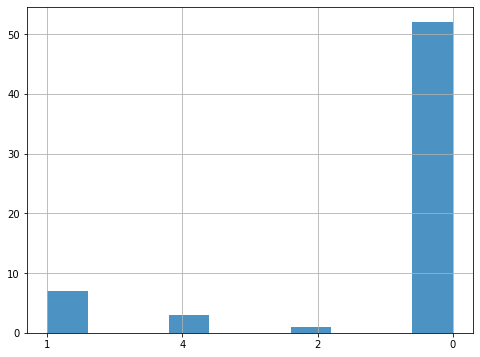

In [76]:
gdf[colName].hist(alpha=0.8, figsize=(8,6))

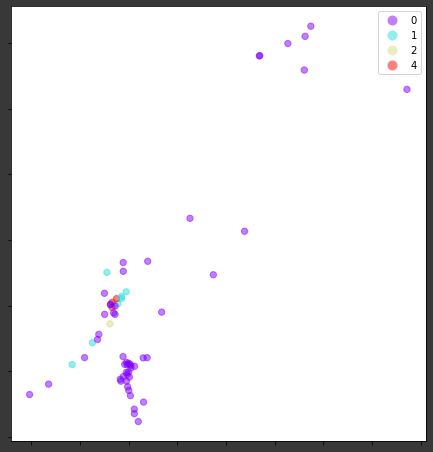

In [77]:
fig, ax = plt.subplots(figsize=(12,8), facecolor='#383838')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf.plot(ax=ax, alpha=.5, markersize=40, column = columnName, legend='true', cmap='rainbow')

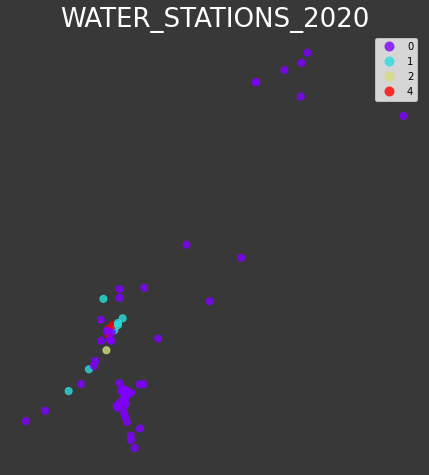

In [78]:
fig, ax = plt.subplots(figsize=(12,8),facecolor='#383838')
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
#gdf2.plot(ax=ax, alpha=.3, color='none', linewidth=1, zorder=1, edgecolor='darkturquoise')
gdf.plot(ax=ax, alpha=.8, markersize=50, column = columnName, legend='true', cmap='rainbow')
plt.title(gisLayer.lyr.name, fontsize=26, color='white')
ax.set_axis_off()
plt.show()

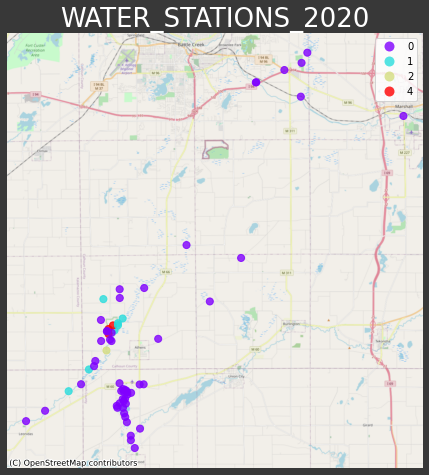

In [80]:
gdf = gdf.to_crs('EPSG:3857')
fig, ax = plt.subplots(figsize=(12,8),facecolor='#383838')
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf.plot(ax=ax, alpha=.8, markersize=50, column = columnName, legend='true', cmap='rainbow')
plt.title(gisLayer.lyr.name, fontsize=26, color='white')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


In [ ]:
 m = folium.Map(location= [44.5, -85], zoom_start = 7, tiles = 'Stamen Toner', prefer_canvas=True)
 folium.GeoJson(gdf).add_to(m)
 m

### mapTable Workflow - Data Processing

In [82]:
# 3(t) - new function to get table from Service
gisTable = gisService.getTable()

'0 - WATER_DATA_2020'

Select index of Table: 0


'TABLE CREATED - WATER_DATA_2020 - id: 1 - url: https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services/WATER_SAMPLING_2020/FeatureServer/1'

In [83]:
# 4(t) - returns ArcGIS Online Table as geoDataframe!
tbl = gisTable.layerQuery()
tbl.head()

SQL query(ENTER for ALL): 
Fields(ENTER for ALL)? 


,OBJECTID,SITE_ID,DATE_TIME,STAFF,SAMP_EQUIP,AIR_TEMP,CUR_PRECIP,PREV_48_PRECIP,WIND_SPEED,WEATHER_NOTES,WATER_TEMP,DO_mgl,SPEC_COND_uS_cm,TURB_NTU,pH,QC,DEPTH_FT,NOTES,SITE_IMAGE,LAB_SAMP_QUES,Ecoli_100ml_,TOT_PHOS_,TOT_NITRO_,LAKE_SAMP_QUES_,SECCH_DEP_FT_,CHLOROPHYLLa_ug_L_,STAT_SAMP_QUES_,ECOLI_STATUS_,DO_STATUS_,TEMP_STATUS_,TURB_STATUS_,GlobalID,NEW_SITE_ID,NEW_SITE_DESC,SITE_NUM,geometry
0,4,ICD-ST-40,1594149480000,ERIC KERNEY,YSI ProDSS,91,None,0.0,None,Hot humid weather for last week,76.0,6.57,569.0,6.24,7.55,Field Measurement,None,None,None,None,None,None,None,NO,None,None,YES,None,2,2,2,a57851bc-5581-4cc0-8a1c-4fbfad04a06f,None,None,None,None
1,5,PNC-ST-45,1594150371022,ERIC KERNEY,YSI ProDSS,91,None,0.0,None,Hot and humid,80.0,0.99,488.4,2.00,7.38,Field Measurement,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,70ec514e-e2bc-4457-acb4-0d316140d3d2,None,None,None,None
2,6,PNC-ST-45,1594150920000,ERIC KERNEY,YSI ProDSS,91,None,0.0,None,Hot and humid,80.0,0.96,488.4,2.05,7.32,Quality Control Sample Field Replicate,None,"QC field replicate, very low DO",None,None,None,None,None,None,None,None,None,None,None,None,None,1502a6b9-d29a-4e74-8fa2-2c8ba4ba2405,None,None,None,None
3,7,PNC-ST-50,1594151365045,ERIC KERNEY,YSI ProDSS,92,None,NaN,None,Hot and humid,80.3,1.04,489.2,2.04,7.37,Field Measurement,None,"Heavy vegetation and duck weed, very low DO",None,None,None,None,None,None,None,None,None,None,None,None,None,542f3a37-8e8a-434b-97be-e5771b387479,None,None,None,None
4,8,PNC-ST-60,1594151831961,ERIC KERNEY,YSI ProDSS,92,None,NaN,None,Hot and humid,81.2,2.14,486.9,2.49,7.55,Field Measurement,None,"Some rice, new dock, warm water",None,None,None,None,None,None,None,None,NO,None,None,None,None,54623cb5-7774-4ad0-91ec-826c5fc01d27,None,None,None,None


In [84]:
tbl.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   OBJECTID            40 non-null     int64   
 1   SITE_ID             40 non-null     object  
 2   DATE_TIME           40 non-null     int64   
 3   STAFF               40 non-null     object  
 4   SAMP_EQUIP          40 non-null     object  
 5   AIR_TEMP            40 non-null     int64   
 6   CUR_PRECIP          5 non-null      object  
 7   PREV_48_PRECIP      19 non-null     float64 
 8   WIND_SPEED          0 non-null      object  
 9   WEATHER_NOTES       40 non-null     object  
 10  WATER_TEMP          40 non-null     float64 
 11  DO_mgl              40 non-null     float64 
 12  SPEC_COND_uS_cm     40 non-null     float64 
 13  TURB_NTU            40 non-null     float64 
 14  pH                  40 non-null     float64 
 15  QC                  40 non-null   

In [88]:
col = tbl.columns
colName = col[11]

In [90]:
# List of unique organization IDs
uniVal = tbl[col[11]].unique()
display(f'Number of {col[11]}(s): {len(uniVal)}')
display(uniVal)

'Number of DO_mgl(s): 39'

array([6.57, 0.99, 0.96, 1.04, 2.14, 7.67, 4.04, 4.26, 4.34, 4.83, 5.49,
       1.54, 1.05, 0.62, 1.02, 8.7 , 8.67, 8.69, 8.36, 1.3 , 2.67, 5.76,
       4.39, 4.36, 7.48, 7.43, 5.22, 4.42, 4.73, 9.38, 3.59, 3.4 , 3.21,
       4.33, 4.02, 9.01, 8.91, 8.  , 7.5 ])

In [93]:
valCol = col[1]
tbl[valCol].value_counts()

NOT-ST-110    5
NOT-ST-120    5
SCD-ST-40     4
NOT-ST-70     4
PNC-ST-40     4
PNC-ST-50     4
ICD-ST-40     3
PNC-ST-60     3
UNT-ST-10     2
PNC-ST-45     2
SPC-ST-90     2
SJR-ST-300    1
ICD-ST-60     1
Name: SITE_ID, dtype: int64

In [94]:
tbl.columns

Index(['OBJECTID', 'SITE_ID', 'DATE_TIME', 'STAFF', 'SAMP_EQUIP', 'AIR_TEMP',
       'CUR_PRECIP', 'PREV_48_PRECIP', 'WIND_SPEED', 'WEATHER_NOTES',
       'WATER_TEMP', 'DO_mgl', 'SPEC_COND_uS_cm', 'TURB_NTU', 'pH', 'QC',
       'DEPTH_FT', 'NOTES', 'SITE_IMAGE', 'LAB_SAMP_QUES', 'Ecoli_100ml_',
       'TOT_PHOS_', 'TOT_NITRO_', 'LAKE_SAMP_QUES_', 'SECCH_DEP_FT_',
       'CHLOROPHYLLa_ug_L_', 'STAT_SAMP_QUES_', 'ECOLI_STATUS_', 'DO_STATUS_',
       'TEMP_STATUS_', 'TURB_STATUS_', 'GlobalID', 'NEW_SITE_ID',
       'NEW_SITE_DESC', 'SITE_NUM', 'geometry'],
      dtype='object')

In [103]:
tbl.groupby(col[4]).count()

,OBJECTID,SITE_ID,DATE_TIME,STAFF,AIR_TEMP,CUR_PRECIP,PREV_48_PRECIP,WIND_SPEED,WEATHER_NOTES,WATER_TEMP,DO_mgl,SPEC_COND_uS_cm,TURB_NTU,pH,QC,DEPTH_FT,NOTES,SITE_IMAGE,LAB_SAMP_QUES,Ecoli_100ml_,TOT_PHOS_,TOT_NITRO_,LAKE_SAMP_QUES_,SECCH_DEP_FT_,CHLOROPHYLLa_ug_L_,STAT_SAMP_QUES_,ECOLI_STATUS_,DO_STATUS_,TEMP_STATUS_,TURB_STATUS_,GlobalID,NEW_SITE_ID,NEW_SITE_DESC,SITE_NUM,geometry
SAMP_EQUIP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YSI ProDSS,40,40,40,40,40,5,19,0,40,40,40,40,40,40,40,0,20,0,10,0,0,0,11,0,0,12,0,1,1,1,40,0,0,0,0


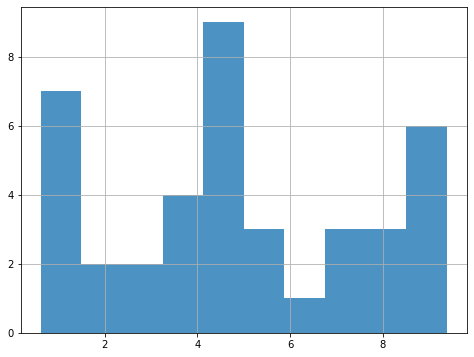

In [110]:
tbl[col[11]].hist(alpha=0.8, figsize=(8,6))

### Sample EPA ArcGIS Server Workflow

In [ ]:
# 1 - Create MapServer with Server root url
rest_url = 'https://gispub.epa.gov/arcgis/rest/services'
gisServer = mapServer(rest_url)

In [ ]:
# 2 - Derive specified arcService from root MapServer Object
gisService = gisServer.getSubService()

In [ ]:
# 3 - Generate layer from specific specified arcService Endpoint
gisLayer = gisService.getLayer()
gisLayer.getInfo()

In [ ]:
# 4 - Return geoDataframe from layer query
gdf = gisLayer.layerQuery()
gdf.head()

## APPENDICIES

In [ ]:
import os
os.environ['RESTAPI_USE_ARCPY'] = 'FALSE'
os.environ['RESTAPI_VERIFY_CERT'] = 'FALSE'

!pip install bmi-arcgis-restapi
import restapi

In [ ]:
%%time 
#!apt update
#!apt upgrade
#!apt-get install -qq libgdal-dev libproj-dev
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
import geopandas as gpd
!pip install contextily
import contextily as ctx
!pip install pygeos
!pip install folium

import time
import getpass
from pathlib import Path
from shapely.geometry import Point
from IPython.display import display
from IPython.display import Markdown as md
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import folium

In [ ]:
# view all installed packages on Colab
!pip list -v